In [1]:
'''
Author: David Brin
Date Created: 5/28/2025

This notebook is for plotting the deviation from the original baseline state to show the difference over time instead of the actual values. 
This should show the effect of the stimulation.
'''

'\nAuthor: David Brin\nDate Created: 5/28/2025\n\nThis notebook is for plotting the deviation from the original baseline state to show the difference over time instead of the actual values. \nThis should show the effect of the stimulation.\n'

In [2]:
%run "../General_LFP_analysis_functions.py"

C:\Users\david\Documents\Voytek Research\psychedelic_organoids\General_LFP_analysis_functions.py:50: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


In [3]:
lfp_data0 = load_lfp(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateAngela\Feb28-25\lfp_data.h5")
spike_times0 = load_spikes(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateAngela\Feb28-25\spike_data.mat")
fm_array0 = set_fm_array(lfp_data0, fmode = "fixed")
lfp_data1 = load_lfp(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateAngela\Dec28-24\lfp_data.h5")
spike_times1 = load_spikes(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateAngela\Dec28-24\spike_data.mat")
fm_array1 = set_fm_array(lfp_data1, fmode = "fixed")
lfp_data2 = load_lfp(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateAngela\Nov16-24\lfp_data.h5")
spike_times2 = load_spikes(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateAngela\Nov16-24\spike_data.mat")
fm_array2 = set_fm_array(lfp_data2, fmode = "fixed")
lfp_data3 = load_lfp(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateAngela\Oct21-24\lfp_data.h5")
spike_times3 = load_spikes(r"C:\Users\david\Documents\Voytek Research\LFP_psych_proj\PlateAngela\Oct21-24\spike_data.mat")
fm_array3 = set_fm_array(lfp_data3, fmode = "fixed")

(6, 8, 65975)
dict_keys(['__header__', '__version__', '__globals__', 'None', 'spike_times', 'spike_waveforms', '__function_workspace__'])
(6, 8, 66775)
dict_keys(['__header__', '__version__', '__globals__', 'None', 'spike_times', 'spike_waveforms', '__function_workspace__'])
(6, 8, 60150)
dict_keys(['__header__', '__version__', '__globals__', 'None', 'spike_times', 'spike_waveforms', '__function_workspace__'])
(6, 8, 60475)
dict_keys(['__header__', '__version__', '__globals__', 'None', 'spike_times', 'spike_waveforms', '__function_workspace__'])


In [4]:
lfp_datas = [lfp_data0, lfp_data1, lfp_data2, lfp_data3]
spike_timess = [spike_times0, spike_times1, spike_times2, spike_times3]
fm_arrays = [fm_array0, fm_array1, fm_array2, fm_array3]
labels = ["Feb28", "Dec28", "Nov16", "Oct21"] 

In [5]:
dose_grid = np.array([
    ["Blank", "Blank", "Met", "Met", "20uM", "20uM", "10uM", "10uM"],
    ["Blank", "Blank", "Met", "Met", "20uM", "20uM", "10uM", "10uM"],
    ["Blank", "Blank", "Met", "Met", "20uM", "20uM", "10uM", "10uM"],
    ["Blank", "Blank", "Met", "Met", "20uM", "20uM", "10uM", "10uM"],
    ["Blank", "Blank", "Met", "Met", "20uM", "20uM", "10uM", "10uM"],
    ["Blank", "Blank", "Met", "Met", "20uM", "20uM", "10uM", "10uM"],
    ])

In [6]:
def calculate_deviation_matrices(fm_arrays, lfp_datas, spike_timess, rows = 6, cols = 8, sampling_rate=100, fmode = "fixed"):
    """
    Calculates deviation matrices for firing rate, aperiodic parameters, and peak parameters.

    Parameters:
        fm_arrays (list): List of fm_array for each file.
        lfp_datas (list): List of LFP data for each file.
        spike_timess (list): List of spike times for each file.
        sampling_rate (int): Sampling rate for firing rate calculations (default 100 Hz).

    Returns:
        dict: Dictionary with matrices of deviation values for firing rate, aperiodic parameters, and peak parameters.
    """
    num_files = len(fm_arrays)
    
    # Initialize matrices to store deviations
    firing_rate_dev = np.zeros((num_files, rows, cols))
    aperiodic_dev = {param: np.zeros((num_files, rows, cols)) for param in ['offset', 'knee', 'exponent']}
    peak_dev = {param: np.zeros((num_files, rows, cols)) for param in ['count', 'frequency', 'amplitude', 'bandwidth']}

    # Get baseline data from the first file
    baseline_spike_times = spike_timess[0]
    baseline_fm_array = fm_arrays[0]

    # Loop through each file and calculate deviations
    for file_idx in range(num_files):
        current_spike_times = spike_timess[file_idx]
        current_fm_array = fm_arrays[file_idx]

        for i in range(rows):
            for j in range(cols):
                # Calculate firing rate deviation
                if baseline_spike_times[i][j] is not None and current_spike_times[i][j] is not None:
                    cur_total_spikes, bas_total_spikes = 0 , 0
                    cur_duration_sec = len(lfp_datas[0][i,j]) / sampling_rate
                    bas_duration_sec = len(lfp_datas[0][i,j]) / sampling_rate
                    if rows == 6:
                        for k in range(4):
                            for l in range(4):
                                if current_spike_times[i, j, k, l] is not None and baseline_spike_times[i, j, k, l] is not None and len(current_spike_times[i, j, k, l]) > 0 and len(baseline_spike_times[i, j, k, l]) > 0:
                                    cur_total_spikes += len(current_spike_times[i, j, k, l][0])
                                    bas_total_spikes += len(baseline_spike_times[i, j, k, l][0])
                        baseline_rate = bas_total_spikes / bas_duration_sec
                        current_rate = cur_total_spikes / cur_duration_sec
                    else:
                        for k in range(16):
                            for l in range(16):
                                if current_spike_times[i, j, k, l] is not None and baseline_spike_times[i, j, k, l] is not None and len(current_spike_times[i, j, k, l]) > 0 and len(baseline_spike_times[i, j, k, l]) > 0:
                                    cur_total_spikes += len(current_spike_times[i, j, k, l][0])
                                    bas_total_spikes += len(baseline_spike_times[i, j, k, l][0])
                        baseline_rate = bas_total_spikes / bas_duration_sec
                        current_rate = cur_total_spikes / cur_duration_sec
                    firing_rate_dev[file_idx, i, j] = current_rate - baseline_rate
                # Calculate aperiodic parameter deviations
                if baseline_fm_array[i, j] is not None and current_fm_array[i, j] is not None:
                    if fmode == "knee":
                        baseline_aperiodic = baseline_fm_array[i, j].aperiodic_params_
                        current_aperiodic = current_fm_array[i, j].aperiodic_params_
                        aperiodic_dev['offset'][file_idx, i, j] = current_aperiodic[0] - baseline_aperiodic[0]
                        aperiodic_dev['knee'][file_idx, i, j] = current_aperiodic[1] - baseline_aperiodic[1]
                        aperiodic_dev['exponent'][file_idx, i, j] = current_aperiodic[2] - baseline_aperiodic[2]
                    else:
                        baseline_aperiodic = baseline_fm_array[i, j].aperiodic_params_
                        current_aperiodic = current_fm_array[i, j].aperiodic_params_
                        aperiodic_dev['offset'][file_idx, i, j] = current_aperiodic[0] - baseline_aperiodic[0]
                        aperiodic_dev['exponent'][file_idx, i, j] = current_aperiodic[1] - baseline_aperiodic[1]

                    
                # Calculate peak parameter deviation (e.g., peak height or count)
                if baseline_fm_array[i, j] is not None and current_fm_array[i, j] is not None:
                    baseline_peaks = baseline_fm_array[i, j].peak_params_
                    current_peaks = current_fm_array[i, j].peak_params_
                    baseline_peak_count = len(baseline_peaks) if baseline_peaks is not None else 0
                    current_peak_count = len(current_peaks) if current_peaks is not None else 0
                    peak_dev['count'][file_idx, i, j] = current_peak_count - baseline_peak_count
                    peak_dev['frequency'][file_idx, i, j] = np.mean(current_peaks[:, 0]) - np.mean(baseline_peaks[:, 0])  # Frequency
                    peak_dev['amplitude'][file_idx, i, j] = np.mean(current_peaks[:, 1]) - np.mean(baseline_peaks[:, 1])  # Amplitude
                    peak_dev['bandwidth'][file_idx, i, j] = np.mean(current_peaks[:, 2]) - np.mean(baseline_peaks[:, 2]) # bandwidth

    return {
        'firing_rate_dev': firing_rate_dev,
        'aperiodic_dev': aperiodic_dev,
        'peak_dev': peak_dev
    }


In [7]:
def plot_deviation_boxplots(dev_matrices, dose_grid, param='offset'):
    """
    Plots boxplots of deviations for a given parameter across different files grouped by doses.

    Parameters:calculate_deviation_matrices(fm_arrays, lfp_datas, spike_timess, rows = 6, cols = 8, sampling_rate=100):
        dev_matrices (dict): Dictionary containing deviation matrices.
        dose_grid (2D array): 6x8 array representing dose groups by well.
        param (str): Parameter to plot ('offset', 'knee', 'exponent', or 'firing_rate').
    """
    data_matrix = dev_matrices['aperiodic_dev'][param] if param in ['offset', 'knee', 'exponent'] else dev_matrices['peak_dev'][param]
    rows, cols = dose_grid.shape
    unique_doses = np.unique(dose_grid)

    # Prepare data for boxplot
    plot_data = []
    for dose in unique_doses:
        for file_idx in range(data_matrix.shape[0]):
            deviations = [data_matrix[file_idx, i, j] for i in range(rows) for j in range(cols) if dose_grid[i, j] == dose]
            plot_data.append(pd.DataFrame({'File': f'File {file_idx + 1}', 'Dose': dose, 'Deviation': deviations}))
    
    combined_df = pd.concat(plot_data, ignore_index=True)

    # Plot boxplot
    plt.figure(figsize=(15, 5))
    sns.boxplot(x='File', y='Deviation', hue='Dose', data=combined_df)
    plt.title(f'Deviation of {param.capitalize()} Across Files')
    plt.xlabel('File')
    plt.ylabel(f'Deviation in {param.capitalize()}')
    plt.legend(title='Dose')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    

In [8]:
def plot_deviation_line_graph(dev_matrices, param='firing_rate', rows=6, cols=8):
    """
    Plots line graphs of deviations for a given parameter across different files.

    Parameters:
        dev_matrices (dict): Dictionary containing deviation matrices.
        param (str): Parameter to plot ('firing_rate', 'offset', 'knee', or 'exponent').
    """
    data_matrix = dev_matrices['aperiodic_dev'][param] if param in ['offset', 'knee', 'exponent'] else dev_matrices['firing_rate_dev']

    plt.figure(figsize=(15, 5))
    for i in range(rows):
        for j in range(cols):
            deviations = data_matrix[:, i, j]
            plt.plot(range(1, len(deviations) + 1), deviations, label=f'Well ({i}, {j})')
    
    plt.title(f'Deviation of {param.capitalize()} Over Time')
    plt.xlabel('File')
    plt.ylabel(f'Deviation in {param.capitalize()}')
    plt.legend(title='Wells', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


In [9]:
def plot_deviation_line_graph(dev_matrices, param='firing_rate', rows=6, cols=8, points = False):
    """
    Plots line graphs of deviations for a given parameter across different files,
    with points added to each line.

    Parameters:
        dev_matrices (dict): Dictionary containing deviation matrices.
        param (str): Parameter to plot ('firing_rate', 'offset', 'knee', or 'exponent').
        rows (int): Number of rows in the well grid.
        cols (int): Number of columns in the well grid.
    """
    # Select the appropriate matrix based on the parameter
    data_matrix = dev_matrices['aperiodic_dev'][param] if param in ['offset', 'knee', 'exponent'] else dev_matrices['firing_rate_dev']
    
    plt.figure(figsize=(15, 5))
    
    for i in range(rows):
        for j in range(cols):
            # Get deviations for this well across all files
            deviations = data_matrix[:, i, j]
            x_values = range(1, len(deviations) + 1)  # File indices
            
            # Plot the line
            plt.plot(x_values, deviations, label=f'Well ({i}, {j})', alpha=0.7)
            if points:
                # Add points to the line
                plt.scatter(x_values, deviations, alpha=0.7)

    plt.title(f'Deviation of {param.capitalize()} Over Time')
    plt.xlabel('File')
    plt.ylabel(f'Deviation in {param.capitalize()}')
    plt.legend(title='Wells', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


In [10]:
def plot_deviation_line_graph_one_dose(dev_matrices, dose_grid, param='firing_rate', rows=6, cols=8, points=False, dose="vehicle"):
    """
    Plots line graphs of deviations for a given parameter across different files,
    for wells with a specified dose.

    Parameters:
        dev_matrices (dict): Dictionary containing deviation matrices.
        dose_grid (2D array): Grid indicating dose labels for each well.
        param (str): Parameter to plot ('firing_rate', 'offset', 'knee', or 'exponent').
        rows (int): Number of rows in the well grid.
        cols (int): Number of columns in the well grid.
        points (bool): Whether to add points to the line graphs.
        dose (str): The dose to filter wells by (e.g., 'vehicle').
    """
    # Select the appropriate matrix based on the parameter
    if param in ['offset', 'knee', 'exponent']:
        data_matrix = dev_matrices['aperiodic_dev'][param]
    elif param == 'firing_rate':
        data_matrix = dev_matrices['firing_rate_dev']
    elif param in ['count', 'amplitude', 'frequency', 'bandwidth']:
        data_matrix = dev_matrices['peak_dev'][param]
    else:
        raise ValueError(f"Invalid parameter: {param}. Must be 'firing_rate', 'offset', 'knee', or 'exponent'.")
        
    max = np.max(data_matrix)
    min = np.min(data_matrix)
    # Create a mask for wells matching the specified dose
    dose_mask = (dose_grid == dose)

    # Extract indices of wells with the specified dose
    well_indices = np.argwhere(dose_mask)

    plt.figure(figsize=(15, 5))

    # Loop over the filtered well indices
    for well_idx in well_indices:
        i, j = well_idx  # Row and column of the well in the grid

        # Get deviations for this well across all files
        deviations = data_matrix[:, i, j]
        x_values = range(1, len(deviations) + 1)  # File indices

        # Plot the line with a label
        plt.plot(x_values, deviations, label=f'Well ({i}, {j})', alpha=0.7)
        if points:
            # Add points to the line with the same label
            plt.scatter(x_values, deviations, alpha=0.7)

    # Add labels and a legend
    plt.ylim(min, max)
    plt.title(f'Deviation of {param.capitalize()} Over Time (Dose: {dose})')
    plt.xlabel('File')
    plt.ylabel(f'Deviation in {param.capitalize()}')

    # Add legend only if there are lines to display
    if well_indices.size > 0:
        plt.legend(title='Wells', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    else:
        print("No wells found for the specified dose.")

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [11]:
def plot_average_deviation_line_graph_by_group(dev_matrices, dose_grid, param='firing_rate', rows=6, cols=8, points=False):
    """
    Plots a line graph showing the average deviation of a parameter for each dose group across files.

    Parameters:
        dev_matrices (dict): Dictionary containing deviation matrices.
        dose_grid (2D array): Grid indicating dose labels for each well.
        param (str): Parameter to plot ('firing_rate', 'offset', 'knee', or 'exponent').
        rows (int): Number of rows in the well grid.
        cols (int): Number of columns in the well grid.
        points (bool): Whether to add points to the line graphs.
    """
    # Select the appropriate matrix based on the parameter
    if param in ['offset', 'knee', 'exponent']:
        data_matrix = dev_matrices['aperiodic_dev'][param]
    elif param == 'firing_rate':
        data_matrix = dev_matrices['firing_rate_dev']
    elif param in ['count', 'amplitude', 'frequency', 'bandwidth']:
        data_matrix = dev_matrices['peak_dev'][param]
    else:
        raise ValueError(f"Invalid parameter: {param}. Must be 'firing_rate', 'offset', 'knee', or 'exponent'.")

    # Find all unique doses in the dose grid
    unique_doses = np.unique(dose_grid)

    plt.figure(figsize=(15, 5))

    for dose in unique_doses:
        # Create a mask for wells in the current dose group
        dose_mask = (dose_grid == dose)
        well_indices = np.argwhere(dose_mask)

        # If no wells for this dose, skip
        if well_indices.size == 0:
            continue

        # Collect deviations for all wells in this group
        group_deviations = []
        for well_idx in well_indices:
            i, j = well_idx  # Row and column of the well in the grid
            group_deviations.append(data_matrix[:, i, j])  # Add deviations for this well

        # Convert to a NumPy array and compute the average deviation for the group
        group_deviations = np.array(group_deviations)
        avg_deviation = np.mean(group_deviations, axis=0)  # Average across wells

        # Plot the average deviation for the group
        x_values = range(1, len(avg_deviation) + 1)  # File indices
        plt.plot(x_values, avg_deviation, label=f'{dose}', alpha=0.8, linewidth=2)

        if points:
            # Add points to the line for the group
            plt.scatter(x_values, avg_deviation, label=f'{dose}', alpha=0.8)

    # Add labels, legend, and grid
    plt.title(f'Average Deviation of {param.capitalize()} by Dose Group')
    plt.xlabel('File')
    plt.ylabel(f'Average Deviation in {param.capitalize()}')
    plt.legend(title='Dose Groups', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [12]:
dev_matrices = calculate_deviation_matrices(fm_arrays, lfp_datas, spike_timess, rows = 6, cols = 8, sampling_rate=100)

C:\Users\david\myenv\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\david\myenv\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


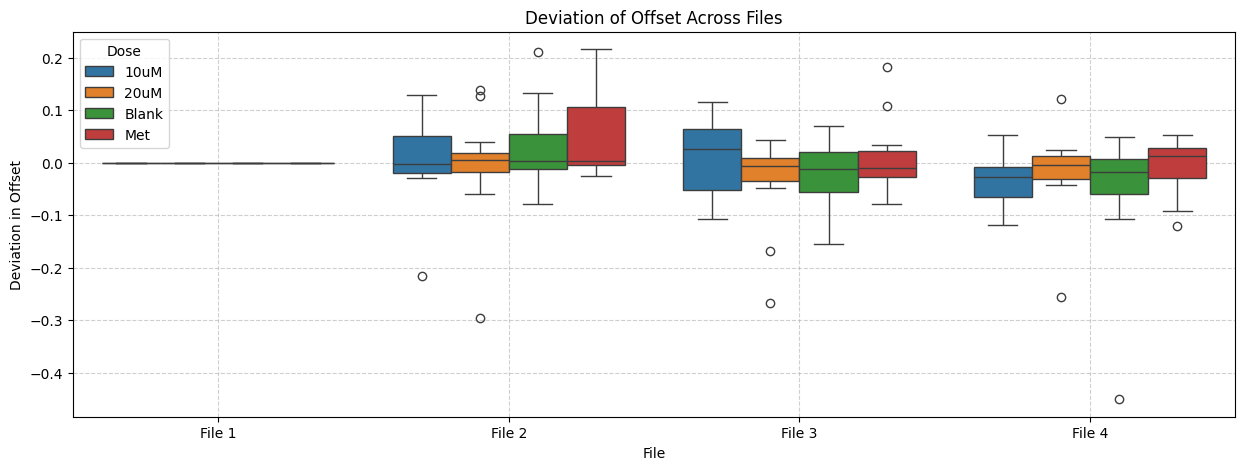

In [13]:
plot_deviation_boxplots(dev_matrices, dose_grid, param='offset')

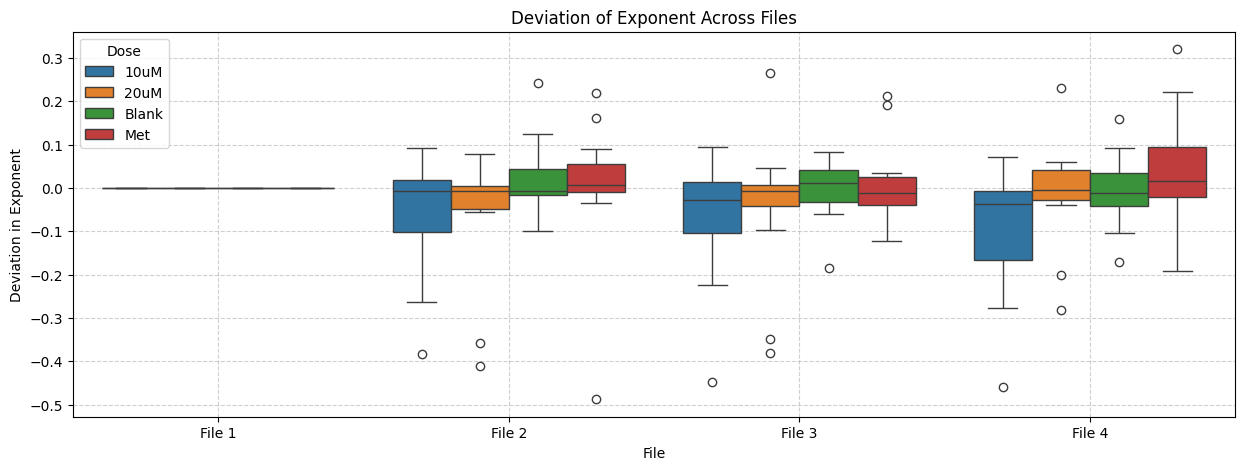

In [14]:
plot_deviation_boxplots(dev_matrices, dose_grid, param='exponent')

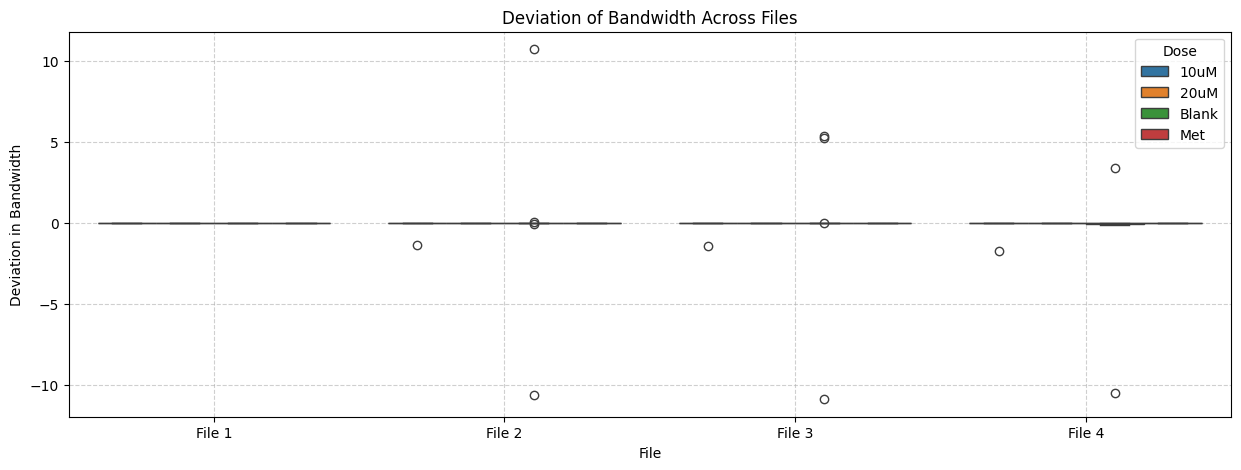

In [15]:
plot_deviation_boxplots(dev_matrices, dose_grid, param='bandwidth')

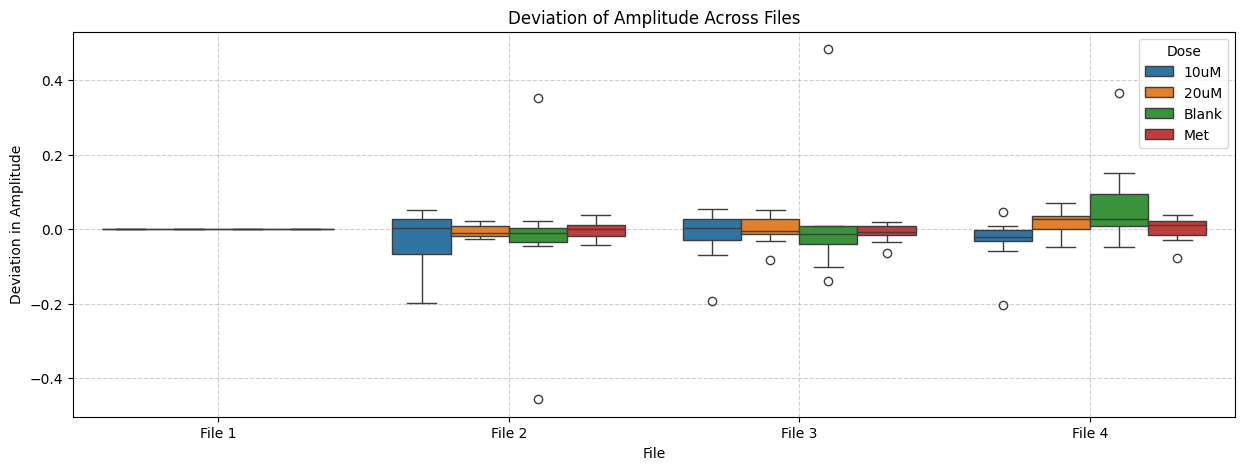

In [16]:
plot_deviation_boxplots(dev_matrices, dose_grid, param='amplitude')

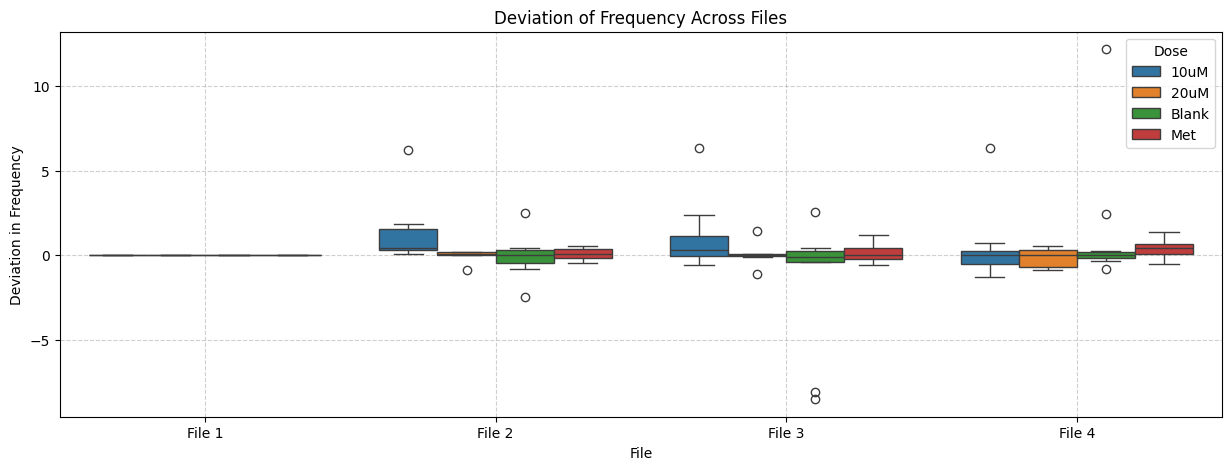

In [17]:
plot_deviation_boxplots(dev_matrices, dose_grid, param='frequency')

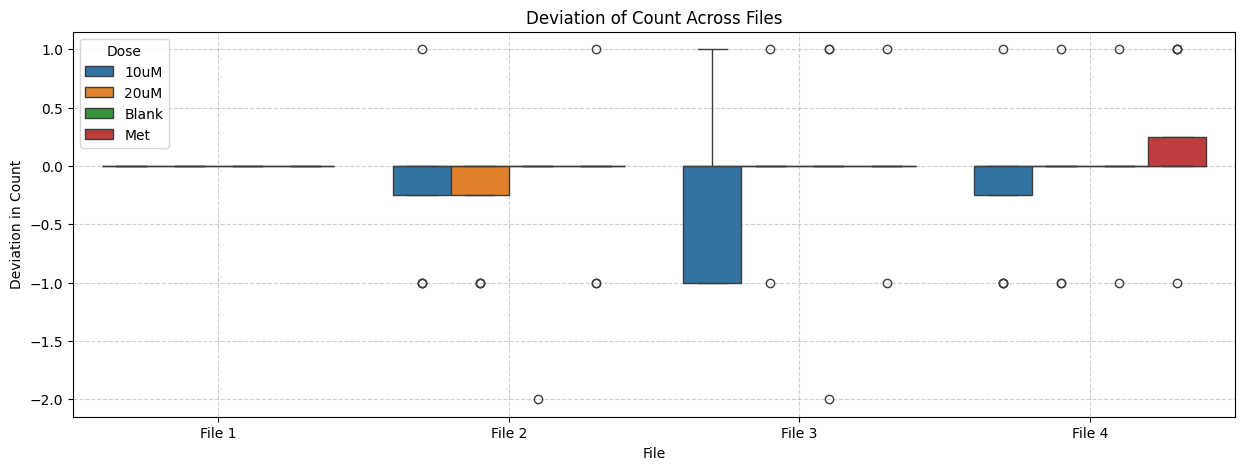

In [18]:
plot_deviation_boxplots(dev_matrices, dose_grid, param='count')

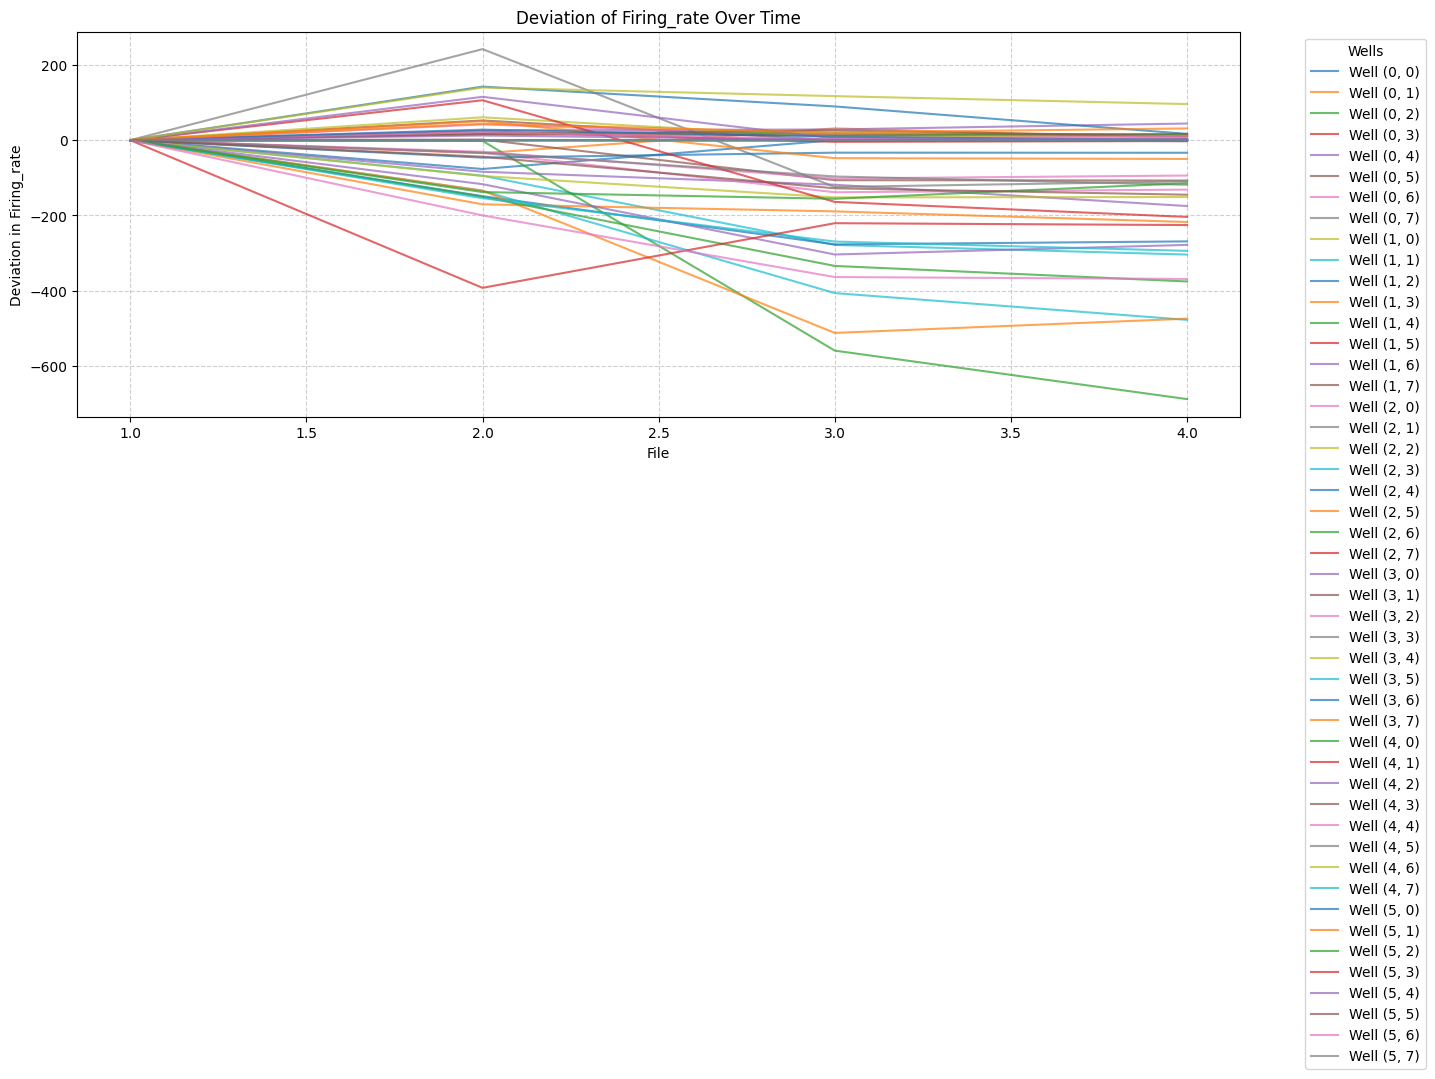

In [19]:
plot_deviation_line_graph(dev_matrices, param='firing_rate')

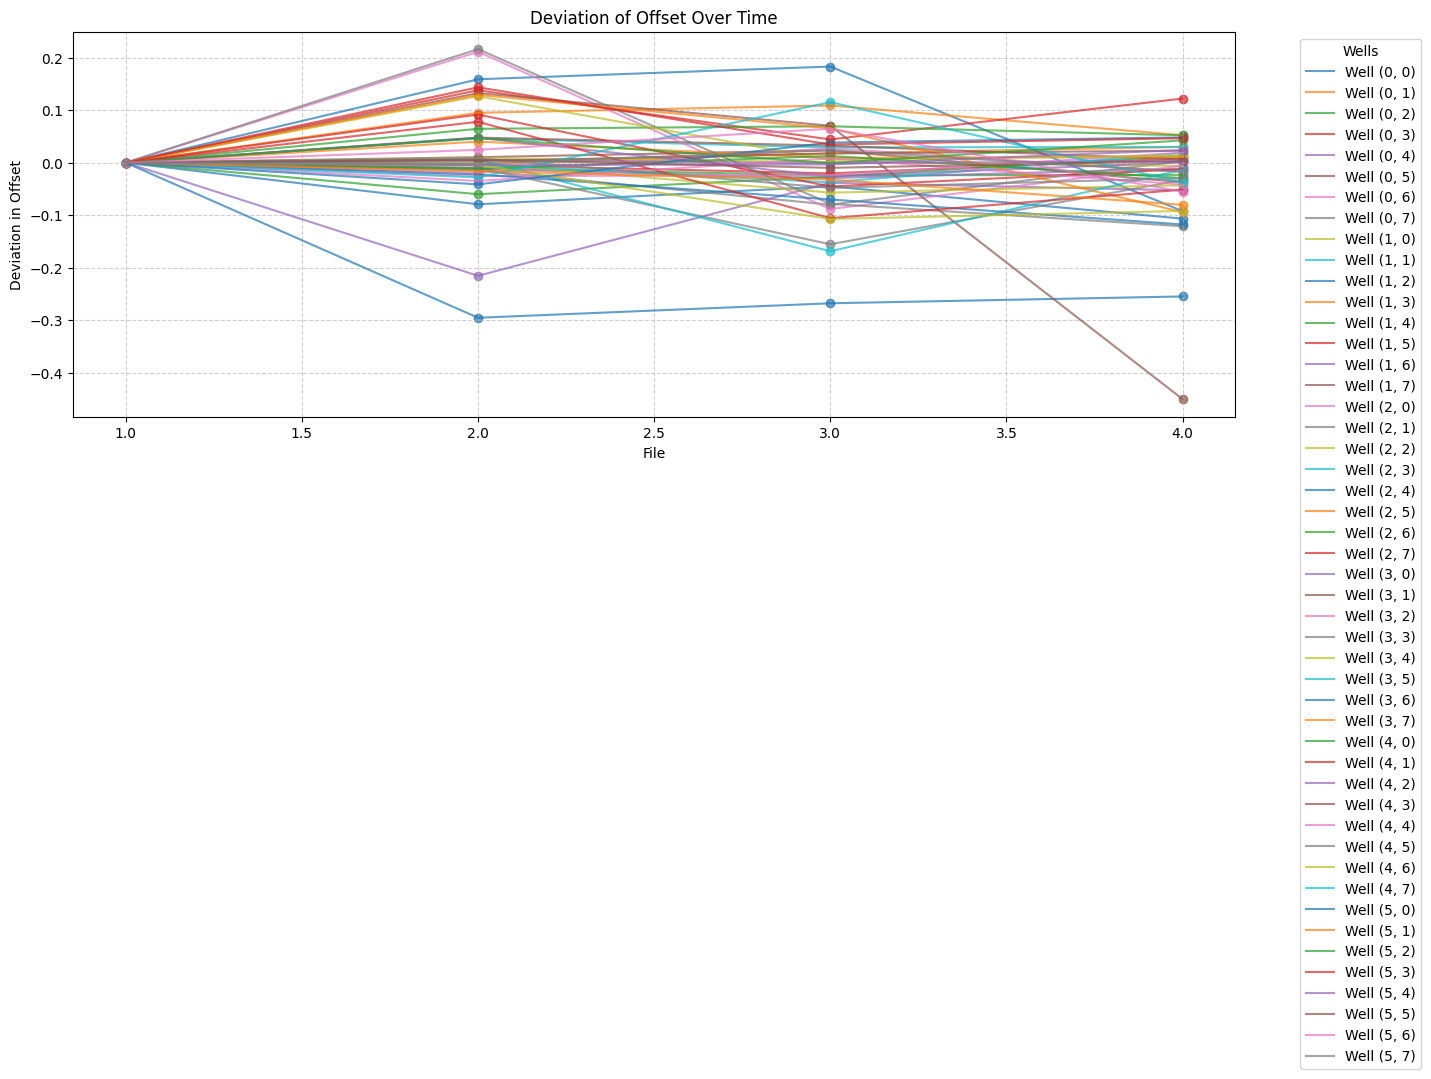

In [20]:
plot_deviation_line_graph(dev_matrices, param='offset', points = True)

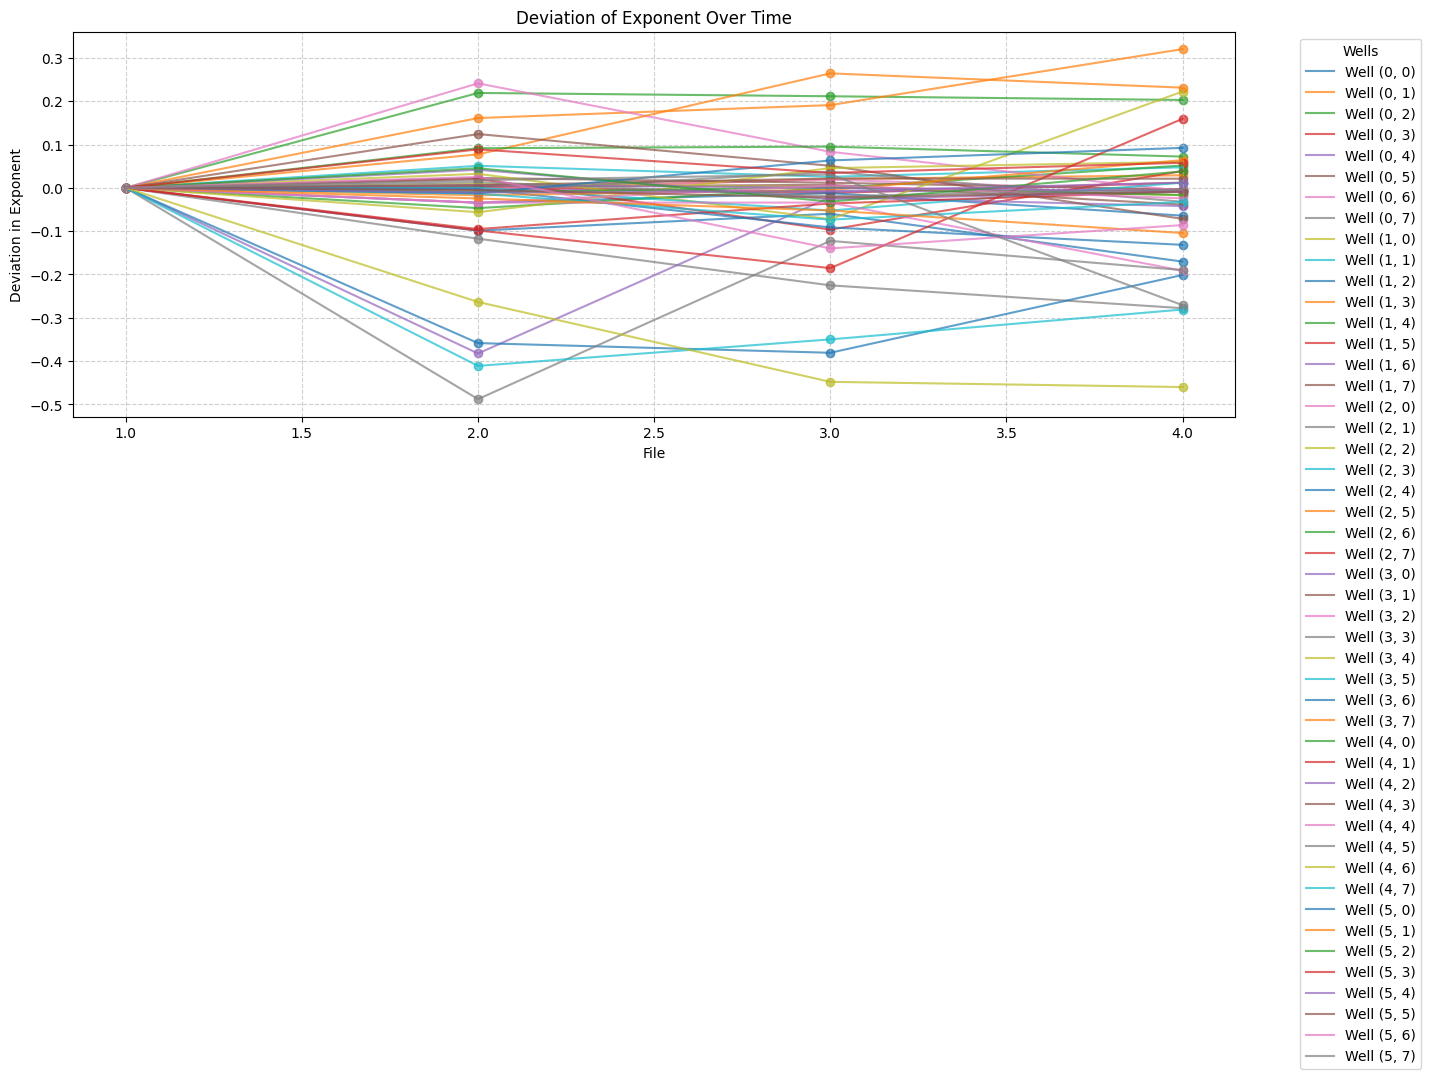

In [21]:
plot_deviation_line_graph(dev_matrices, param='exponent', points = True)

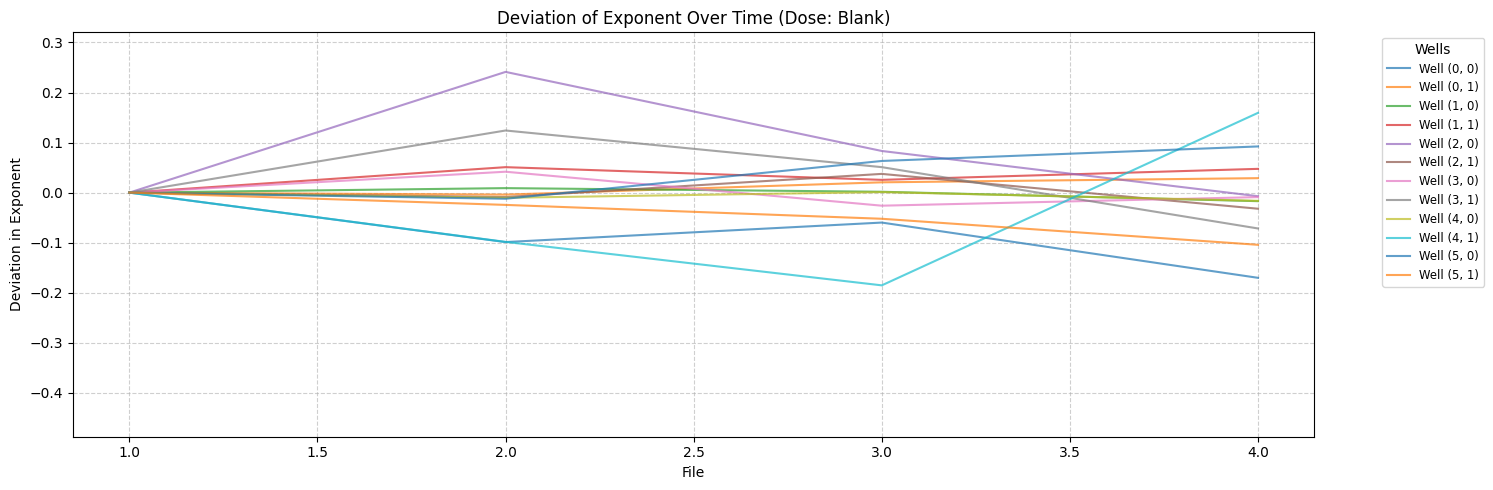

In [36]:
plot_deviation_line_graph_one_dose(dev_matrices, dose_grid, param='exponent', rows=6, cols=8, points = False, dose = "Blank")

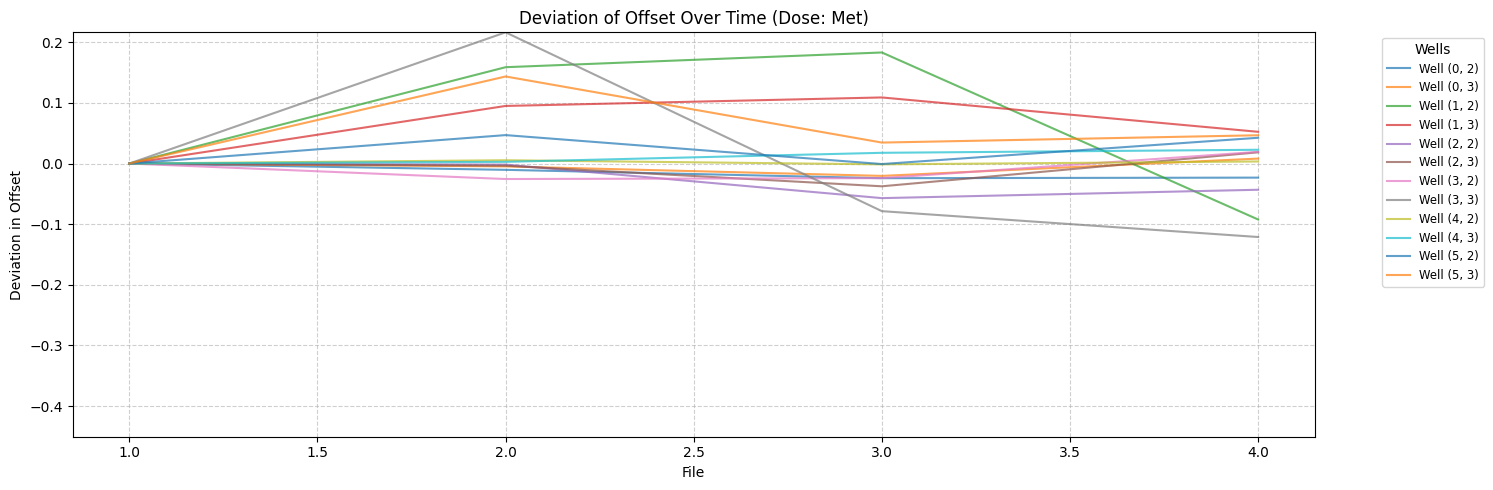

In [37]:
plot_deviation_line_graph_one_dose(dev_matrices, dose_grid, param='offset', rows=6, cols=8, points = False, dose = "Met")

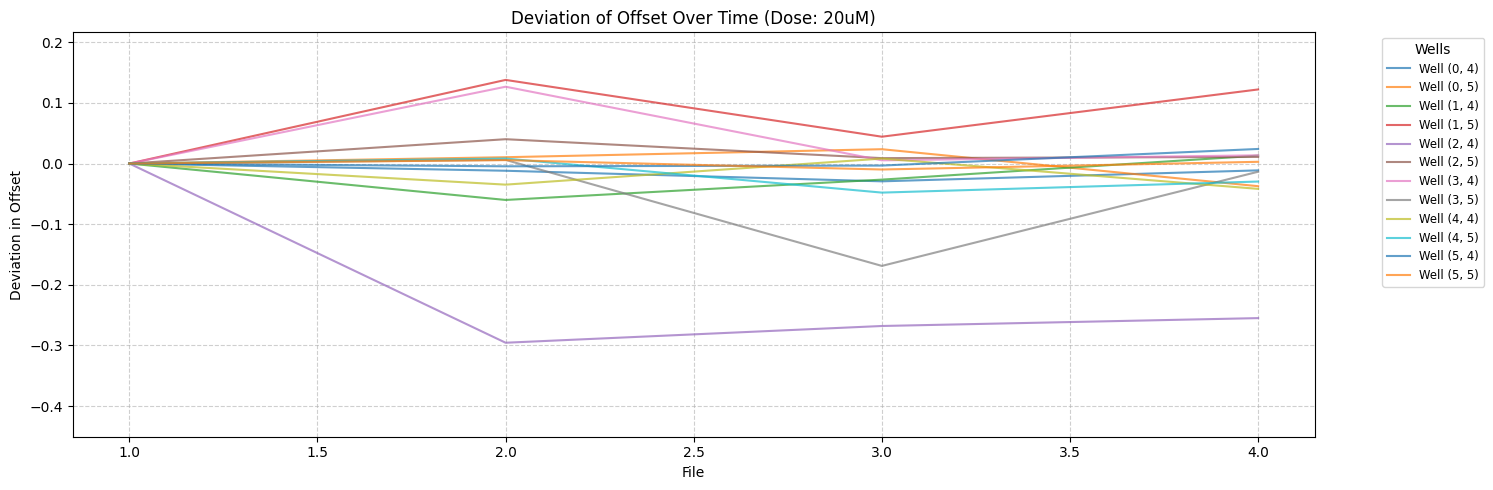

In [38]:
plot_deviation_line_graph_one_dose(dev_matrices, dose_grid, param='offset', rows=6, cols=8, points = False, dose = "20uM")

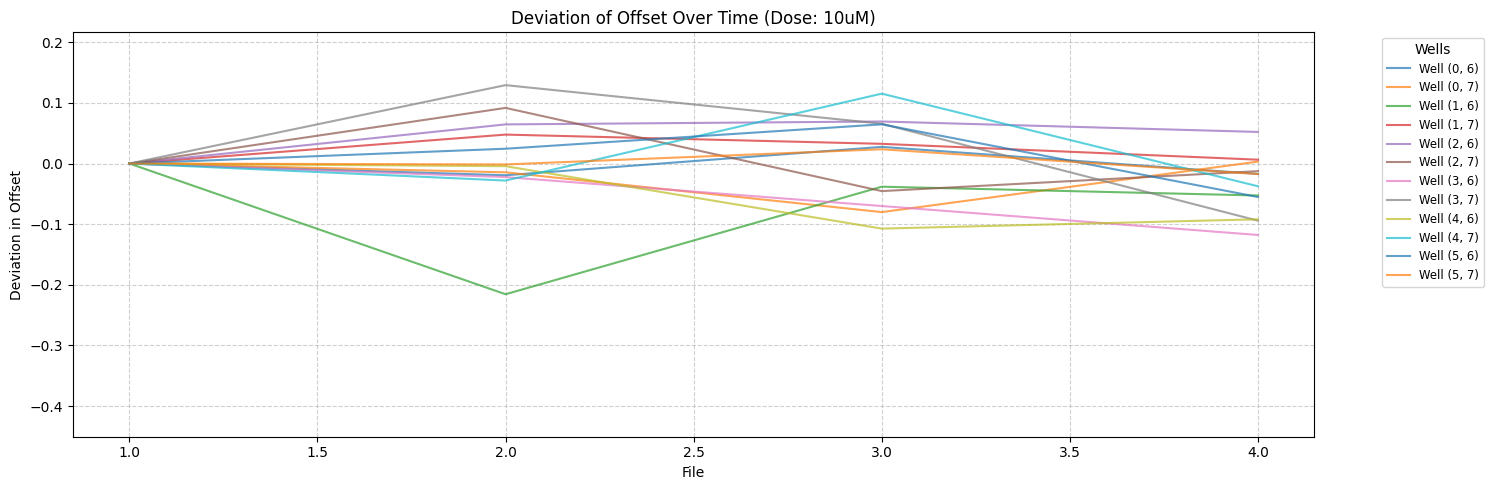

In [39]:
plot_deviation_line_graph_one_dose(dev_matrices, dose_grid, param='offset', rows=6, cols=8, points = False, dose = "10uM")

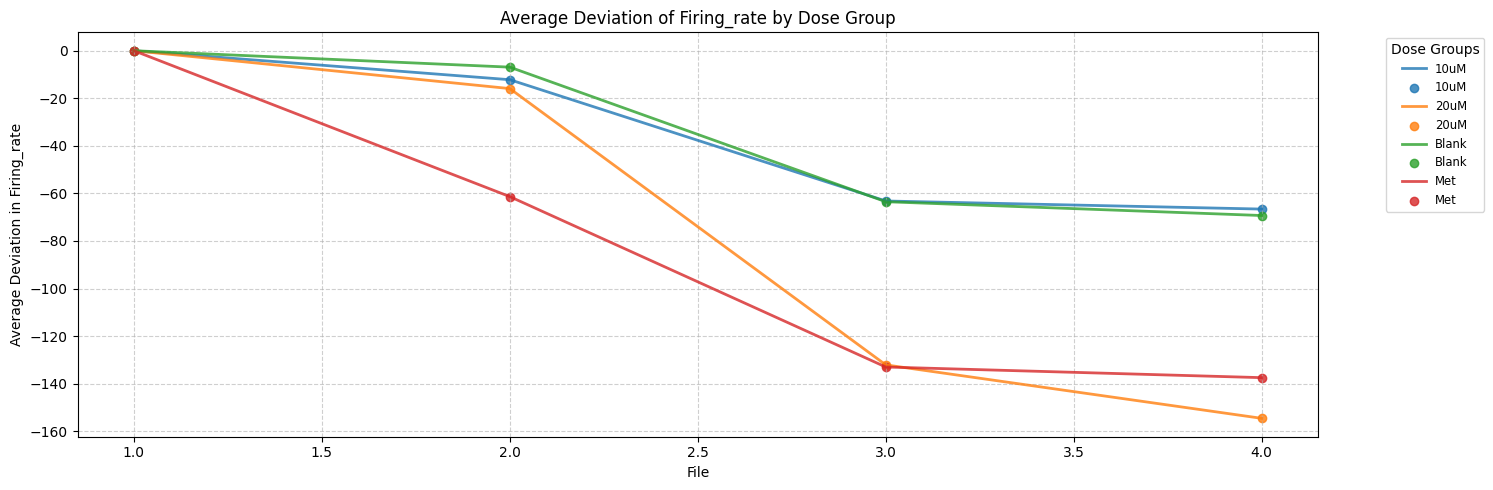

In [30]:
plot_average_deviation_line_graph_by_group(dev_matrices, dose_grid, param='firing_rate', rows=6, cols=8, points=True)

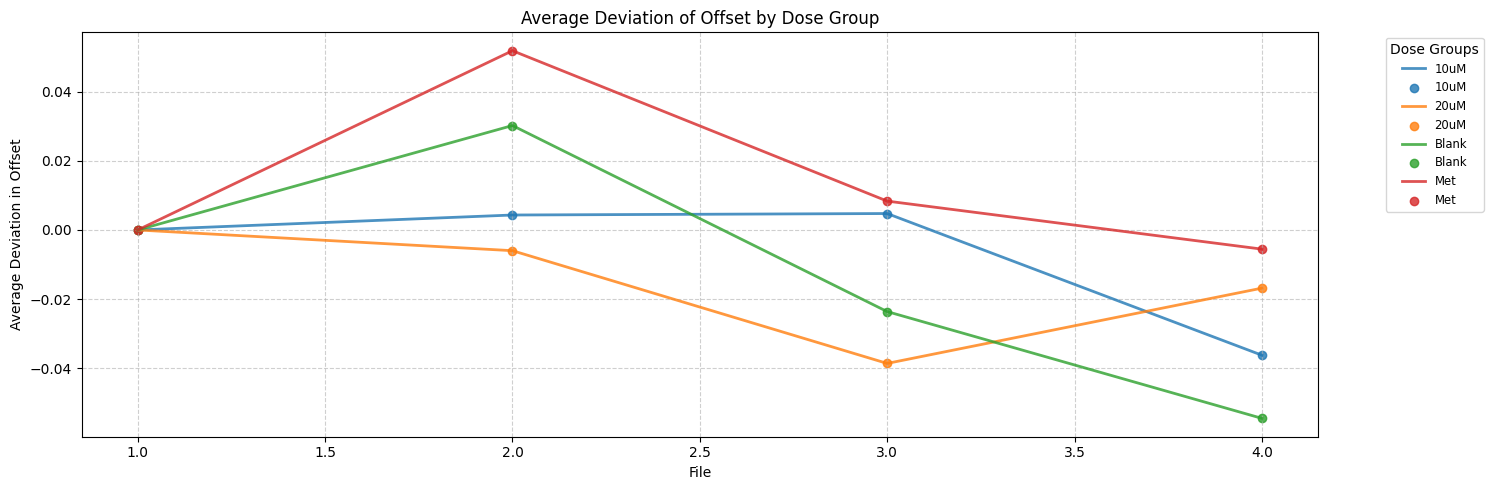

In [31]:
plot_average_deviation_line_graph_by_group(dev_matrices, dose_grid, param='offset', rows=6, cols=8, points=True)

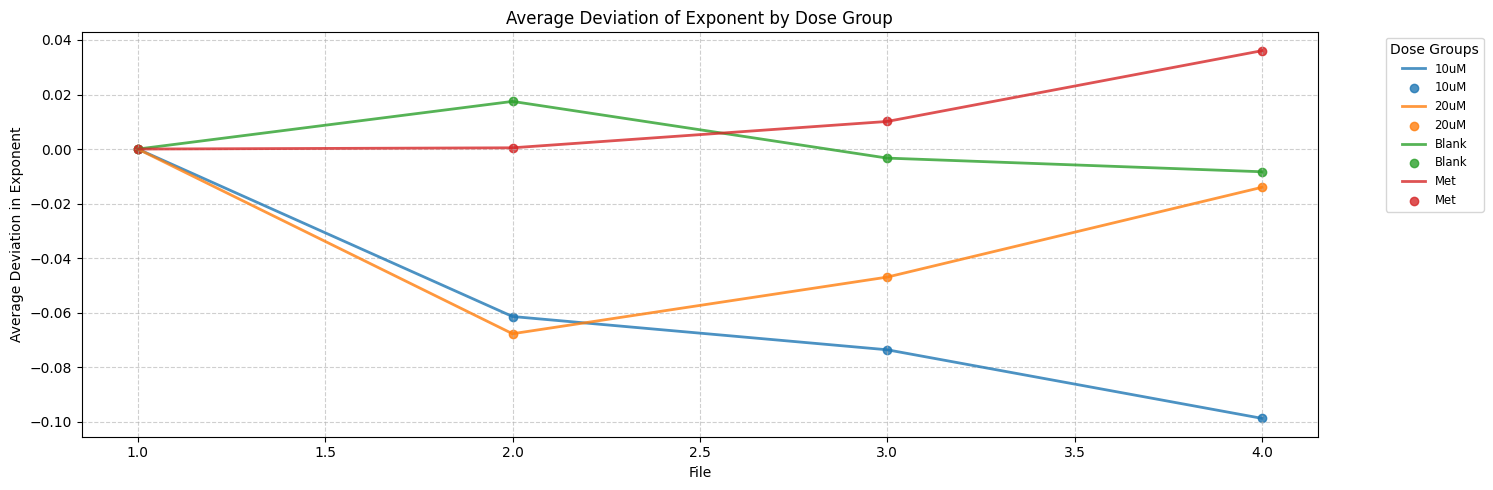

In [32]:
plot_average_deviation_line_graph_by_group(dev_matrices, dose_grid, param='exponent', rows=6, cols=8, points=True)

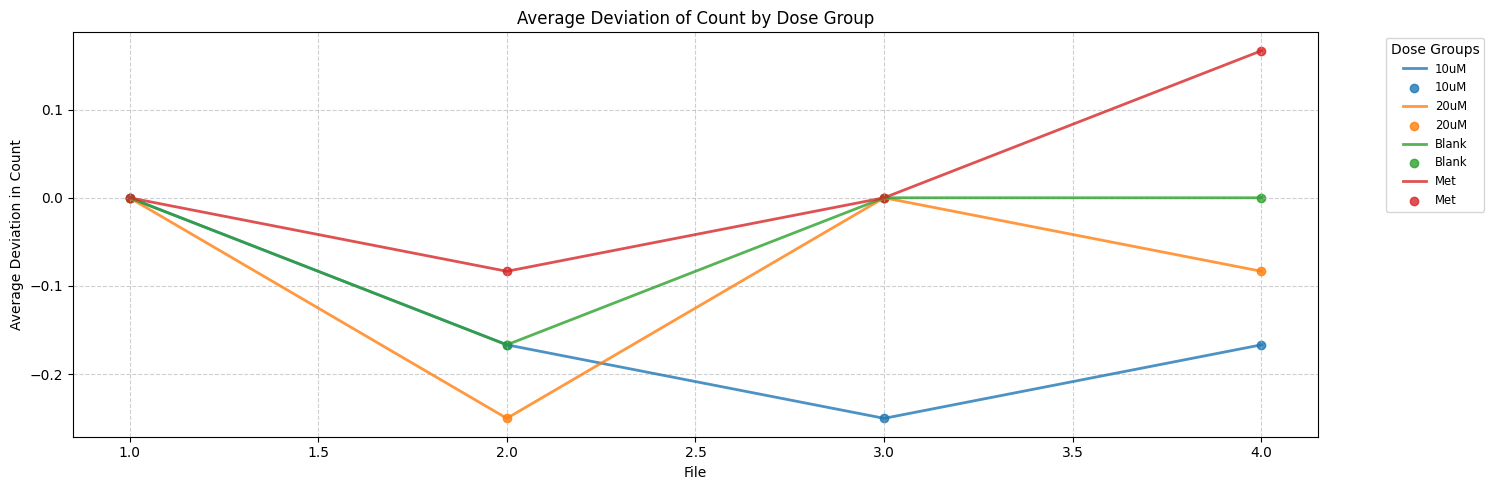

In [33]:
plot_average_deviation_line_graph_by_group(dev_matrices, dose_grid, param='count', rows=6, cols=8, points=True)

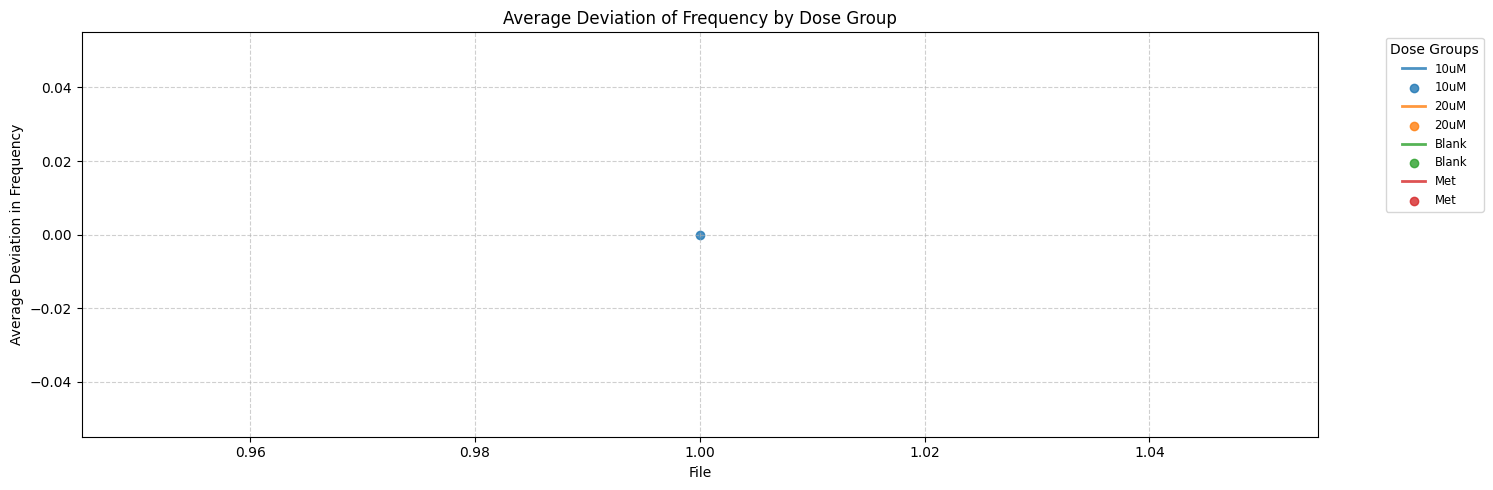

In [34]:
plot_average_deviation_line_graph_by_group(dev_matrices, dose_grid, param='frequency', rows=6, cols=8, points=True)

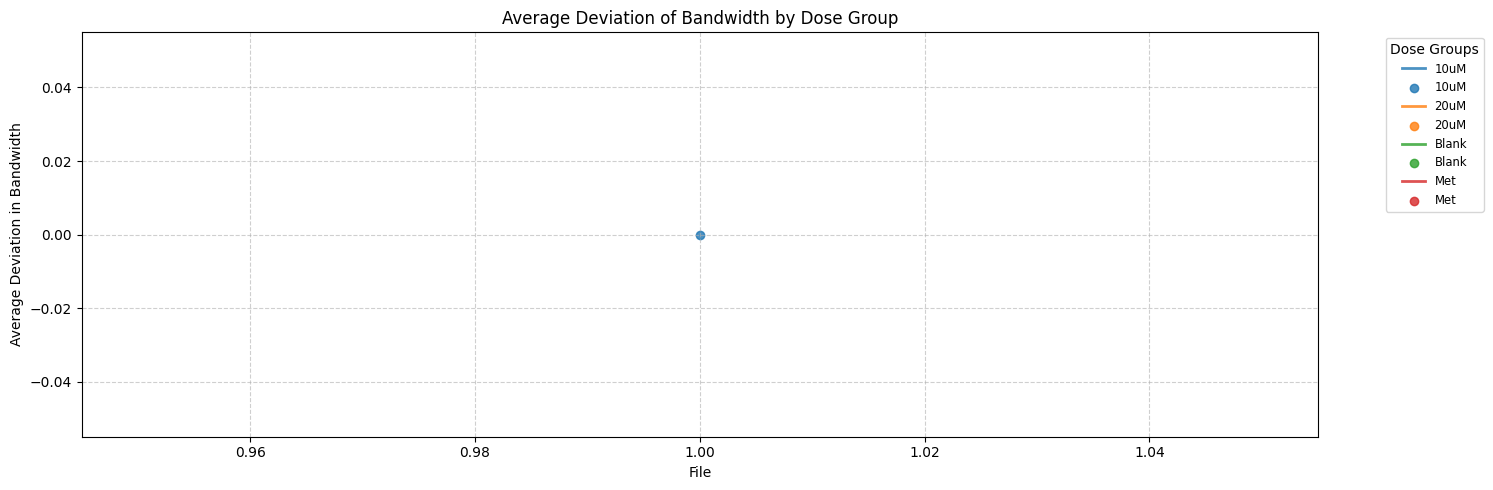

In [35]:
plot_average_deviation_line_graph_by_group(dev_matrices, dose_grid, param='bandwidth', rows=6, cols=8, points=True)